# BFGS

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def f(x):
    return 4*(x[0] - 2.)**2 + (x[1] - 2.)**2

In [3]:
def grad_f(x):
    return np.array([8 * (x[0] - 2), 2 * (x[1] - 2) ])

In [4]:
from scipy.optimize import minimize
x0 = np.array([8.0, 6.0])
res = minimize(f, x0)
print(res)
# x : 2, 2 에서 최소값 

      fun: 7.283151428858541e-14
 hess_inv: array([[  1.25018288e-01,   3.54818344e-04],
       [  3.54818344e-04,   5.06884188e-01]])
      jac: array([  1.14206028e-07,   5.53956566e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 2.00000001,  2.00000027])


In [5]:
x0

array([ 8.,  6.])

In [6]:
# 속도는 gradient 보다 빠르고 newton 보다 편함 
path_bfgs = []
MaxIter = 10
learning_rate = 0.5
x0 = np.array([8.0, 6.0])
path_bfgs.append(x0)
B0 = np.eye(len(x0))
for i in range(MaxIter):
    print(x0)
    grad = grad_f(x0)
    if np.linalg.norm(grad) < 1E-9:
        break
    p0 = -np.linalg.solve(B0, grad)
    s0 = learning_rate * p0
    x1 = x0 + s0
    y0 = (grad_f(x1) - grad).reshape(-1,1)# convert to a column vector
    B1 = B0 + np.dot(y0, y0.T) / np.dot(y0.T, s0) \
            - (np.dot(np.dot(B0, s0).reshape(-1,1), np.dot(s0, B0).reshape(-1,1).T)) / np.dot(np.dot(B0, s0), s0)
    x0 = x1
    path_bfgs.append(x0)
    B0 = B1

[ 8.  6.]
[-16.   2.]
[-6.93536266  0.44870392]
[-2.40147157  2.77187719]
[-0.03662444  1.10482367]
[ 1.09551125  2.19828218]
[ 1.58022518  1.96466892]
[ 1.792618    2.00312797]
[ 1.89646068  1.99821338]
[ 1.94823682  1.99965448]


In [7]:
paths = path_bfgs
paths = np.array(np.matrix(paths).T)

In [8]:
x = np.linspace(-20, 10, 101)
y = np.linspace(-20, 10, 101)
X,Y = np.meshgrid(x, y)
f = lambda x, y : 4*(x-2)**2 + (y-2)**2

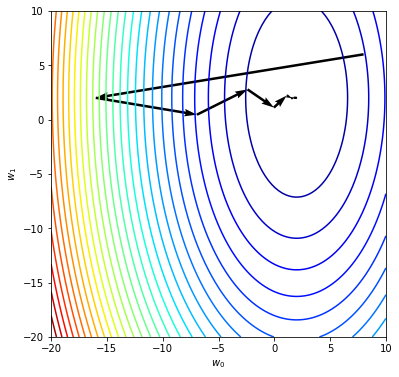

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.contour(X, Y, f(X,Y), cmap=plt.cm.jet, levels=np.linspace(0, max(f(X,Y).flatten()),30))
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
plt.show()

## 3가지 방법 비교
1. Steepest Descent(Gradient Descent) Method
1. Newton Method
1. BFGS

In [10]:
x0 = np.array([1, 1])
path_gd = []
MaxIter = 500
learning_rate = 0.1
x0 = np.array([8.0, 6.0])
path_gd.append(x0)
for i in range(MaxIter):
    grad = grad_f(x0)
    if np.linalg.norm(grad) < 1E-9:
        break
    x1 = x0 - learning_rate * grad
    x0 = x1
    path_gd.append(x0)

In [11]:
print(x0)

[ 2.  2.]


In [12]:
paths = path_gd
paths = np.array(np.matrix(paths).T)

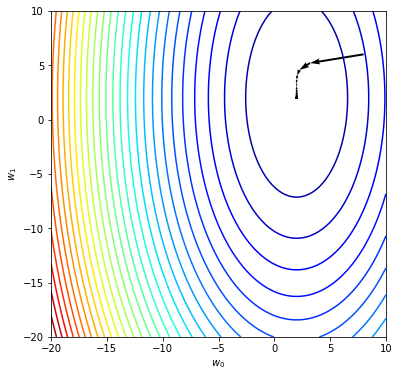

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.contour(X, Y, f(X,Y), cmap=plt.cm.jet, levels=np.linspace(0, max(f(X,Y).flatten()),30))
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
plt.show()

In [14]:
def hessian_f(x):
    return np.array([[8., 0.], [0., 2.]])

In [15]:
x0 = np.array([1, 1])
path_nt = []
MaxIter = 100
learning_rate = 1
x0 = np.array([8.0, 6.0])
path_nt.append(x0)
for i in range(MaxIter):
    grad = grad_f(x0)
    hess = hessian_f(x0)
    if np.linalg.norm(grad) < 1E-9:
        break
    x1 = x0 - learning_rate * np.linalg.solve(hess,grad)
    x0 = x1
    path_nt.append(x0)

In [16]:
paths = path_nt
paths = np.array(np.matrix(paths).T)

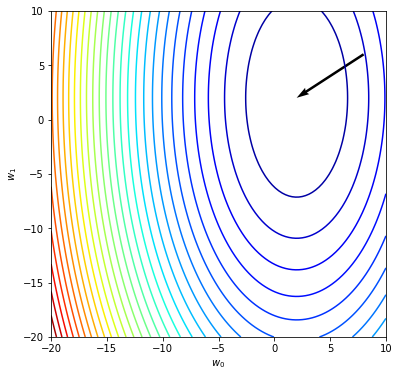

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.contour(X, Y, f(X,Y), cmap=plt.cm.jet, levels=np.linspace(0, max(f(X,Y).flatten()),30))
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
plt.show()

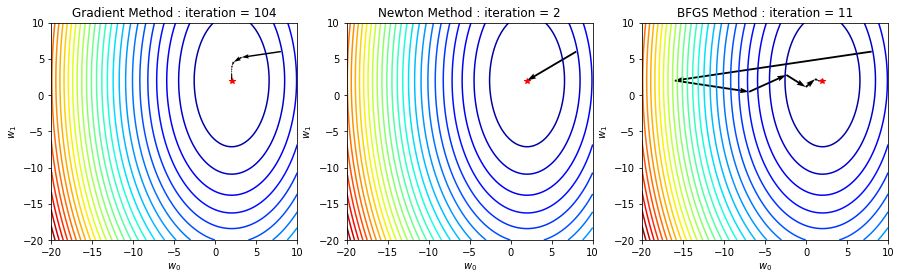

In [18]:
# fig, ax = plt.subplots(figsize=(6, 6))
fig = plt.figure(figsize=(15, 4))
plt.subplot(131)
paths = path_gd
paths = np.array(np.matrix(paths).T)
plt.contour(X, Y, f(X,Y), cmap=plt.cm.jet, levels=np.linspace(0, max(f(X,Y).flatten()),30))
plt.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
plt.plot(2, 2, 'r*')
plt.title('Gradient Method : iteration = {0}'.format(len(path_gd)))
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')

plt.subplot(132)
paths = path_nt
paths = np.array(np.matrix(paths).T)
plt.contour(X, Y, f(X,Y), cmap=plt.cm.jet, levels=np.linspace(0, max(f(X,Y).flatten()),30))
plt.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
plt.plot(2, 2, 'r*')
plt.title('Newton Method : iteration = {0}'.format(len(path_nt)))
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')

plt.subplot(133)
paths = path_bfgs
paths = np.array(np.matrix(paths).T)
plt.contour(X, Y, f(X,Y), cmap=plt.cm.jet, levels=np.linspace(0, max(f(X,Y).flatten()),30))
plt.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
plt.plot(2, 2, 'r*')
plt.title('BFGS Method : iteration = {0}'.format(len(path_bfgs)))
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.show()

plt.show()

|  | Gradient Descent   | Newton | BFGS |
|------|------|------|------|
|   iteration 횟수  | 104|2|11|
|   gradient 계산  | O|O|O|
|   hessian 계산  | X|O|X|
|   linear system 풀이  | X|O|O|
|   속도  | 느림|빠름|보통|
|   안정성  | 높음|많이 낮음|낮음|